In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
left = pd.DataFrame({ 'id':[1,2,3,4,5], 
                     'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
                     'subject_id':['sub1','sub2','sub4','sub6','sub5']}) 
right = pd.DataFrame( {'id':[1,2,3,4,5], 
                       'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
                       'subject_id':['sub2','sub4','sub3','sub6','sub5']})

In [3]:
# left join
pd.merge(left, right, on='subject_id', how='left')

,id_x,Name_x,subject_id,id_y,Name_y
0,1,Alex,sub1,NaN,NaN
1,2,Amy,sub2,1.0,Billy
2,3,Allen,sub4,2.0,Brian
3,4,Alice,sub6,4.0,Bryce
4,5,Ayoung,sub5,5.0,Betty


In [4]:
pd.merge(left, right, on='subject_id', how='right')

,id_x,Name_x,subject_id,id_y,Name_y
0,2.0,Amy,sub2,1,Billy
1,3.0,Allen,sub4,2,Brian
2,NaN,NaN,sub3,3,Bran
3,4.0,Alice,sub6,4,Bryce
4,5.0,Ayoung,sub5,5,Betty


In [5]:
pd.merge(left, right, on='subject_id', how='outer')

,id_x,Name_x,subject_id,id_y,Name_y
0,1.0,Alex,sub1,NaN,NaN
1,2.0,Amy,sub2,1.0,Billy
2,3.0,Allen,sub4,2.0,Brian
3,4.0,Alice,sub6,4.0,Bryce
4,5.0,Ayoung,sub5,5.0,Betty
5,NaN,NaN,sub3,3.0,Bran


In [6]:
left = pd.DataFrame({'id':[1,2,3,4,5], 'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame({'id':[1,2,3,4,5],'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],'subject_id':['sub2','sub4','sub3','sub6','sub5']})
print(pd.merge(left,right,on=['id','subject_id']))

   id  Name_x subject_id Name_y
0   4   Alice       sub6  Bryce
1   5  Ayoung       sub5  Betty


In [7]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]],columns=['letter', 'number'])
pd.concat([df1, df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [8]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],columns=['letter', 'number'])
df4 = pd.DataFrame([['bird', 'polly'], ['monkey','george']], columns=['animal', 'name'])
pd.concat([df1, df4], axis=1)

,letter,number,animal,name
0,a,1,bird,polly
1,b,2,monkey,george


In [9]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo","bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two","one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small","small", "large", "small", "small","large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [10]:
table = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'], aggfunc="sum")
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [11]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],columns=['C'], aggfunc="sum", fill_value=0)
table

C        large  small
A   B                
bar one      4      5
    two      7      6
foo one      4      1
    two      0      6

In [12]:
table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],aggfunc={'D': "mean", 'E': "mean"})
table

D         E
A   C                        
bar large  5.500000  7.500000
    small  5.500000  8.500000
foo large  2.000000  4.500000
    small  2.333333  4.333333

In [13]:
table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],aggfunc={'D': "mean",'E': ["min", "max", "mean"]})
table

D   E              
               mean max      mean min
A   C                                
bar large  5.500000   9  7.500000   6
    small  5.500000   9  8.500000   8
foo large  2.000000   5  4.500000   4
    small  2.333333   6  4.333333   2

In [14]:
table = pd.pivot_table(df, values='D', index=['A','B'], columns=['C'], aggfunc=np.sum)

/var/folders/4p/lff6wpsj2ddfk0g_sgwlr8700000gn/T/ipykernel_7436/3357635904.py:1: FutureWarning: The provided callable <function sum at 0x108d67520> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  table = pd.pivot_table(df, values='D', index=['A','B'], columns=['C'], aggfunc=np.sum)


<Axes: xlabel='A,B'>

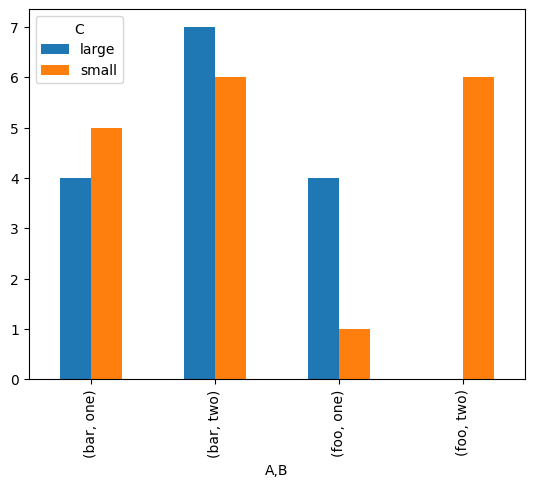

In [15]:
table.plot(kind='bar')

In [16]:
a = np.array(["foo", "foo", "foo", "foo", "bar", "bar", "bar", "bar", "foo", "foo", "foo"], dtype=object)
b = np.array(["one", "one", "one", "two", "one", "one", "one", "two", "two", "two", "one"], dtype=object)
c = np.array(["dull", "dull", "shiny", "dull", "dull", "shiny", "shiny", "dull", "shiny", "shiny", "shiny"], dtype=object)
cross = pd.crosstab(a, [b, c], rownames=['a'], colnames=['b', 'c'])
cross

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     2    1     0
foo    2     2    1     2

In [17]:
foo = pd.Categorical(['a', 'b'], categories=['a', 'b', 'c'])
bar = pd.Categorical(['d', 'e'], categories=['d', 'e', 'f'])
print(pd.crosstab(foo, bar))

col_0  d  e
row_0      
a      1  0
b      0  1


<Axes: xlabel='a'>

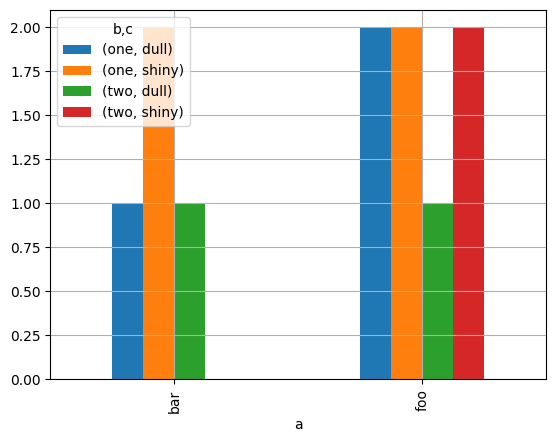

In [18]:
cross.plot(kind='bar', grid=True)

In [19]:
df = pd.DataFrame([[4, 9],] * 3, columns=['A', 'B'])
df.apply(np.sqrt)
df.apply(np.sum, axis=0) #열로 적용
df.apply(np.sum, axis=1) #행으로 적용

0    13
1    13
2    13
dtype: int64

In [20]:
x = pd.Series([1,2,3], index=['one', 'two', 'three'])
y = pd.Series(['foo', 'bar', 'baz'], index=[1,2,3])
z = {1: 'A', 2: 'B', 3: 'C'}
x.map(y)
x.map(z)

one      A
two      B
three    C
dtype: object

In [21]:
def myfunc(n):
    return len(n)
x = map(myfunc, ('apple', 'banana', 'cherry'))
list(x)

[5, 6, 6]

In [22]:
dir = "./butler.xlsx"

df = pd.read_excel(dir)
df

,DrivingAssignment,MilesTraveled,NumberOfDeliveries,TravelTime
0,1,100,4,9.3
1,2,50,3,4.8
2,3,100,4,8.9
3,4,100,2,6.5
4,5,50,2,4.2
5,6,80,2,6.2
6,7,75,3,7.4
7,8,65,4,6.0
8,9,90,3,7.6
9,10,90,2,6.1


In [23]:
df.set_index('DrivingAssignment', inplace=True)
df

,MilesTraveled,NumberOfDeliveries,TravelTime
DrivingAssignment,,,
1,100,4,9.3
2,50,3,4.8
3,100,4,8.9
4,100,2,6.5
5,50,2,4.2
6,80,2,6.2
7,75,3,7.4
8,65,4,6.0
9,90,3,7.6


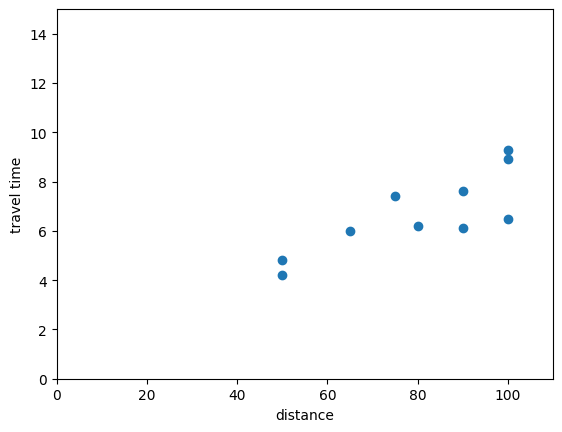

In [24]:
plt.scatter(df.MilesTraveled, df.TravelTime)
plt.xlim(0,110)
plt.ylim(0,15)
plt.xlabel('distance')
plt.ylabel('travel time')
plt.show()

In [25]:
! pip install statsmodels

In [26]:
y = df.TravelTime
x = df.MilesTraveled

import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()

/Users/kangmingyun/miniconda3/envs/DataminingWithPythonProgramming/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TravelTime   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     15.81
Date:                Wed, 01 Nov 2023   Prob (F-statistic):            0.00408
Time:                        13:24:44   Log-Likelihood:                -13.092
No. Observations:                  10   AIC:                             30.18
Df Residuals:                       8   BIC:                             30.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2739      1.401      0.909      0.390      -1.956       4.504
MilesTraveled     0.0678      0.017      3.977      0.004       0.028       0.107
==============================================================================
Omnibus:                        0.694   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.707   Jarque-Bera (JB):                0.623
Skew:                          -0.333   Prob(JB):                        0.732
Kurtosis:                       1.974   Cond. No.                         363.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
y = df.TravelTime
x = df[['MilesTraveled', 'NumberOfDeliveries']]

x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()

/Users/kangmingyun/miniconda3/envs/DataminingWithPythonProgramming/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TravelTime   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.88
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           0.000276
Time:                        13:26:00   Log-Likelihood:                -6.8398
No. Observations:                  10   AIC:                             19.68
Df Residuals:                       7   BIC:                             20.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8687      0.952     -0.913      0.392      -3.119       1.381
MilesTraveled          0.0611      0.010      6.182      0.000       0.038       0.085
NumberOfDeliveries     0.9234      0.221      4.176      0.004       0.401       1.446
==============================================================================
Omnibus:                        0.039   Durbin-Watson:                   2.515
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.151
Skew:                           0.074   Prob(JB):                        0.927
Kurtosis:                       2.418   Cond. No.                         435.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""